In [6]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# import custom functions

from custom_functions import get_data_summary, our_metrics, eval_metrics #evaluate_model


import warnings
warnings.filterwarnings('ignore')

##  Import some dataset and define variable for each of data

In [10]:
y_train =pd.read_csv('data/y_train.csv')


In [11]:
X_test=pd.read_csv('data/X_test.csv')


In [13]:
X_train=pd.read_csv('data/X_train.csv')

In [16]:
y_test=pd.read_csv('data/y_test.csv')

In [17]:
y_test.shape

(1119173, 1)

## First usage logistic regression default after split by .... test_size=0.25,

In [15]:
# Modelling by initiallion of instance 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9209
_____________________
F1-score: 0.0008
_____________________
Fbeta_score with beta=1.5: 0.0006
_____________________
Fbeta_score with beta=2: 0.0005
_____________________
Fbeta_score with beta=3: 0.0004
_____________________
Recall 0.0004
_____________________
Specificity 0.9998


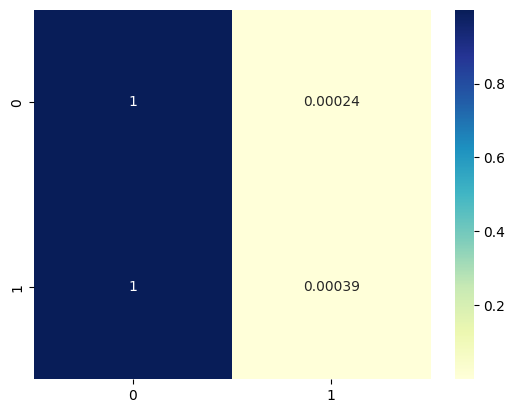

In [18]:
our_metrics(y_test,y_pred)

## Second usage logistic regression with scaling data ...min-max

In [21]:
X_train_minmax=pd.read_csv('data/X_train_minmax.csv')

In [20]:
X_test_minmax=pd.read_csv('data/X_test_minmax.csv')

(1119173, 47)

In [26]:
# Modelling by initiallion of instance 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_minmax,y_train)
y_pred_minmax = logistic_regression.predict(X_test_minmax)

#y_pred_minmax= logistic_regression.predict(pd.read_csv('data/X_test.csv'))

In [24]:
y_test.shape

(1119173, 1)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9212
_____________________
F1-score: 0.0065
_____________________
Fbeta_score with beta=1.5: 0.0047
_____________________
Fbeta_score with beta=2: 0.0041
_____________________
Fbeta_score with beta=3: 0.0036
_____________________
Recall 0.0033
_____________________
Specificity 0.9998


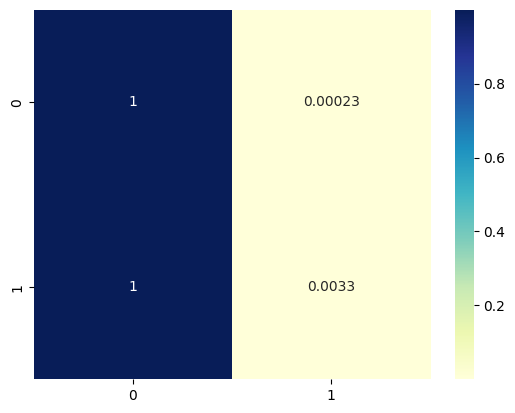

In [27]:
our_metrics(y_test,y_pred_minmax)

## Third usage logistic regression with scaling data ...standardization 

In [55]:
X_train_std_small=pd.read_csv('data/X_train_std_small.csv')

In [56]:
y_train_small=pd.read_csv('data/y_train_small.csv')   

In [57]:
X_test_std_large=pd.read_csv('data/X_train_std_large.csv')   

In [87]:
X_test_std_large.shape

(2350262, 47)

In [59]:
logistic_regression = LogisticRegression()
logistic_regression.fit(  X_train_std_small, y_train_small  )
y_pred_stan= logistic_regression.predict(X_test_std_large)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9212
_____________________
F1-score: 0.006
_____________________
Fbeta_score with beta=1.5: 0.0043
_____________________
Fbeta_score with beta=2: 0.0038
_____________________
Fbeta_score with beta=3: 0.0033
_____________________
Recall 0.003
_____________________
Specificity 0.9998


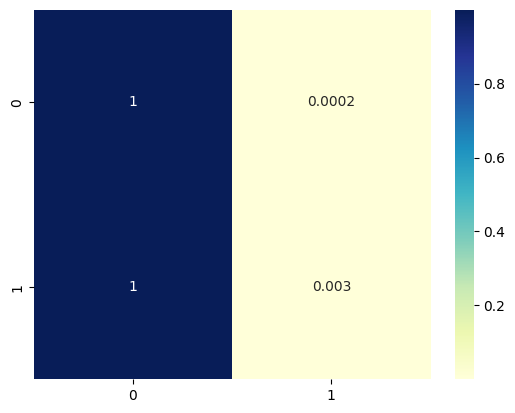

In [60]:
our_metrics(y_train_large,y_pred_stan)

## Four Tuning Hyperparameter by usage RandomizedSearchCV

In [61]:
X_train_std_small=pd.read_csv('data/X_train_std_small.csv')

In [62]:
y_train_small=pd.read_csv('data/y_train_small.csv')   

In [64]:
y_train_small.shape

(1007255, 1)

In [66]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train_std_small,y_train_small )
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/anas/project_Modeling/fraud_detection_electricity_company/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/anas/project_Modeling/fraud_detection_electricity_company/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/anas/project_Modeling/fraud_detection_electricity_company/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/anas/project_Modeling/fraud_detection_electricity_company/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

Best Score: 0.9211384738048563
Best Hyperparameters: {'C': 0.0001064856866565112, 'penalty': 'none', 'solver': 'lbfgs'}


In [67]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9211384738048563
Best Hyperparameters: {'C': 0.0001064856866565112, 'penalty': 'none', 'solver': 'lbfgs'}


## Five instance model logistic regression and configure Hyperparameter in model 

In [68]:
y_train=pd.read_csv('data/y_train.csv') 

In [69]:
X_train=pd.read_csv('data/X_train.csv') 

In [70]:
X_test=pd.read_csv('data/X_test.csv')     

In [90]:
y_train.shape

(3357517, 1)

In [91]:
logistic_regression_hyper = LogisticRegression(C= 0.0001064856866565112, penalty= 'none', solver='lbfgs')
logistic_regression_hyper.fit(  X_train, y_train  )
y_pred_hyper= logistic_regression_hyper.predict(X_test) 

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9212
_____________________
F1-score: 0.006
_____________________
Fbeta_score with beta=1.5: 0.0043
_____________________
Fbeta_score with beta=2: 0.0038
_____________________
Fbeta_score with beta=3: 0.0033
_____________________
Recall 0.003
_____________________
Specificity 0.9998


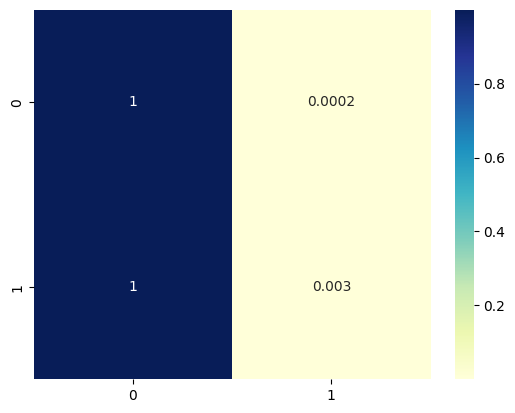

In [92]:
our_metrics(y_train_large,y_pred_stan)

In [108]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, recall_score
# load dataset

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# Define scoring metrics
scoring = {
    'ROC AUC': make_scorer(roc_auc_score, greater_is_better=True),
    'F1-score': make_scorer(f1_score, greater_is_better=True),
    'Recall': make_scorer(recall_score, greater_is_better=True)
}
# define search
search = RandomizedSearchCV(model, space, n_iter=10, scoring = '', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train_std_small,y_train_small )
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



ValueError: '' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.

In [106]:

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9211384738048563
Best Hyperparameters: {'C': 0.0001064856866565112, 'penalty': 'none', 'solver': 'lbfgs'}
